In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.makedirs('drive/My Drive/Vasudha/Rice leaf disease/dataset')
os.makedirs('drive/My Drive/Vasudha/Rice leaf disease/dataset/train')
os.makedirs('drive/My Drive/Vasudha/Rice leaf disease/dataset/val')

In [3]:
pip install split-folders tqdm

In [4]:

import splitfolders
path='drive/My Drive/Vasudha/Rice leaf disease'
splitfolders.ratio(path, output='drive/My Drive/Vasudha/Rice leaf disease/dataset',  ratio=(0.8, 0.2))

Copying files: 119 files [00:02, 48.75 files/s]


In [5]:
!pip install "torch==1.4" "torchvision==0.5.0"

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-type" content="text/html; charset=utf-8">
<meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
<title>Page not found &middot; GitHub Pages</title>
<style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: table-cell
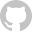
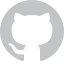

In [6]:
!curl -s https://course.fast.ai/setup/colab

In [7]:
from fastai.vision import *

In [8]:

path='drive/My Drive/Vasudha/Rice leaf disease/dataset/train'
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

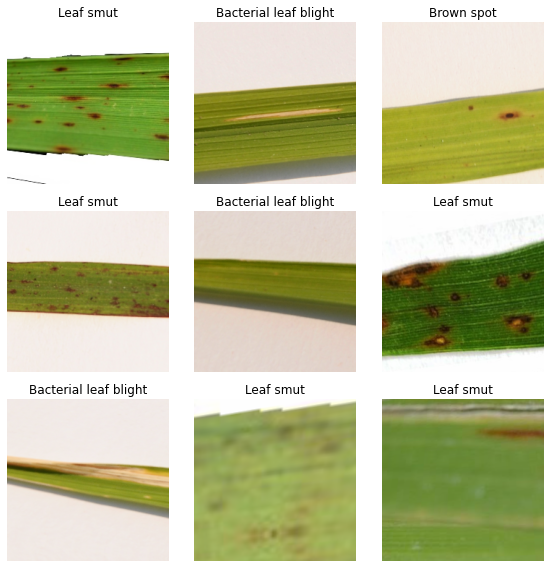

In [9]:
data.show_batch(rows=3, figsize=(8,8))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [11]:
learn.fit_one_cycle(10) 

epoch,train_loss,valid_loss,accuracy,time
0,1.580123,1.581201,0.263158,00:19
1,1.537163,1.124837,0.578947,00:10
2,1.291739,1.357662,0.736842,00:10
3,1.135759,1.859810,0.684211,00:10
4,0.935826,2.180163,0.578947,00:10
5,0.807186,2.259895,0.578947,00:10
6,0.739699,1.925755,0.631579,00:10
7,0.662950,1.518138,0.631579,00:10
8,0.617648,1.009241,0.736842,00:10
9,0.575602,0.672460,0.842105,00:10


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


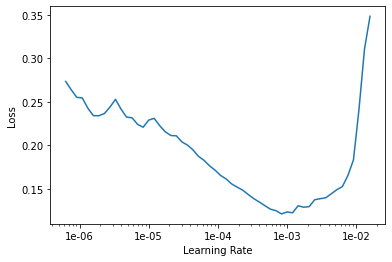

In [15]:
 learn.recorder.plot()

In [16]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.063934,0.389583,0.842105,00:11
1,0.110389,0.226361,0.894737,00:11
2,0.213421,0.182288,0.894737,00:11
3,0.184781,0.242388,0.947368,00:10
4,0.208943,0.258627,0.947368,00:10
5,0.205940,0.292309,0.947368,00:11
6,0.183537,0.343681,0.947368,00:10
7,0.162063,0.372715,0.894737,00:11
8,0.146181,0.410522,0.894737,00:10
9,0.144876,0.448401,0.842105,00:10


In [17]:
learn.save('stage-2')

In [18]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

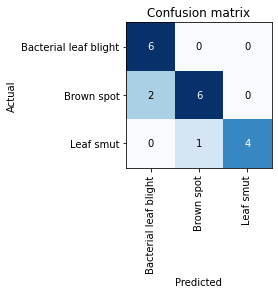

In [20]:
interp.plot_confusion_matrix()

In [21]:
path=Path('drive/My Drive/Vasudha/Rice leaf disease/dataset/val')

In [22]:
img = open_image(path/'Brown spot/DSC_0112.jpg')


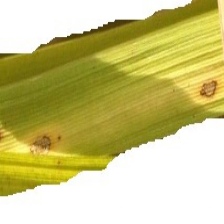

In [23]:
img.resize(torch.Size([img.shape[0],224,224]))

In [24]:
learn.export()
path=Path('drive/My Drive/Vasudha/Rice leaf disease/dataset/train')

learn = load_learner(path)

In [25]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Brown spot'

In [26]:
import shutil
shutil.rmtree('drive/My Drive/Vasudha/Rice leaf disease/dataset')